In [1]:
using PyPlot
using Random
using Distributions

In [2]:
include("model.jl");
include("ensemble.jl");
include("diagnostics.jl");
include("optimize.jl");
include("plotting.jl");

In [10]:
t = Array(2020:1.:2100);
β = 1.5 # damages (trillion $ / celsius^2)
utility_discount_rate = 0.014 # low value (stern review)
GWP = 100. # global world product (trillion $)
reduce_cost = 0.10*GWP
remove_cost = 0.20*GWP
geoeng_cost = 0.30*GWP
adapt_cost = 0.25*GWP
economics = Economics(
    β, utility_discount_rate,
    reduce_cost, remove_cost, geoeng_cost, adapt_cost,
    0., 0., 0., 0.,
    baseline_emissions(t)
)

Economics(1.5, 0.014, 10.0, 20.0, 30.0, 25.0, 0.0, 0.0, 0.0, 0.0, [5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0  …  1.125, 1.0, 0.875, 0.75, 0.625, 0.5, 0.375, 0.25, 0.125, 0.0])

In [11]:
Random.seed!(1)
d = Normal(0.65, 0.13)
feedback_samples = rand(d, 20)
feedback_samples[feedback_samples .>= 0.999] .= NaN
feedback_samples[feedback_samples .<= 0.] .= NaN

ECS₀ = 1.2
ECS_samples = ECS₀ ./ (1. .-feedback_samples);

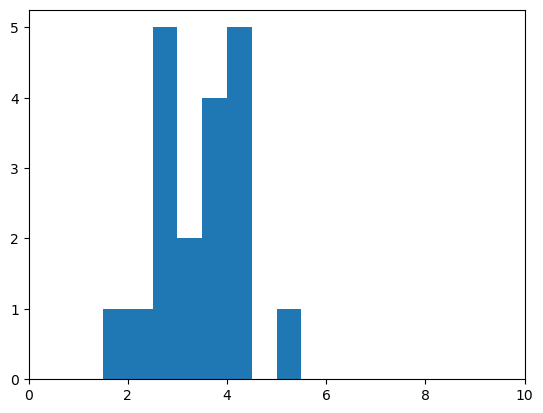

(0, 10)

In [12]:
hist(ECS_samples, bins=0.:0.5:20.)
xlim([0,10])

In [ ]:
ensemble = Dict{String, ClimateModel}();
first = true
for member_id in 1:length(ECS_samples)
    present_year = 2020.
    ECS = ECS_samples[member_id]
    name = "member $member_id";
    controls = init_linear_controls(t);
    model = ClimateModel(name, ECS, t, controls, economics, present_year);
    optimize!(model)
    
    if CO₂(model)[end-1] < 1.e5
        ensemble[name] = model
    end
        
    if first; plot_setup(model); first=false; end
end

Converged after 501 iterations. Converged after 501 iterations. Converged after 501 iterations. Converged after 501 iterations. Converged after 501 iterations. Converged after 501 iterations. 

In [ ]:
plot_ensemble_stats(ensemble, t)